In [18]:
import numpy as np
import pandas as pd
import math
from sklearn import preprocessing as pre
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_log_error, mean_squared_error

In [19]:
train = pd.read_csv('C:/Users/Administrator/Downloads/train.csv')
test = pd.read_csv('C:/Users/Administrator/Downloads/test.csv')
sample_submission = pd.read_csv ("C:/Users/Administrator/Downloads/sample_submission.csv")
pd.options.display.max_columns = 999

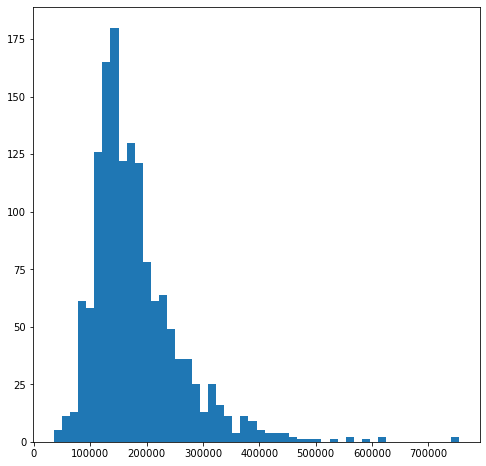

In [20]:
plt.figure(figsize= (8,8))
plt.hist(train['SalePrice'], bins = 50)
plt.show()

In [21]:
train['SalePriceLog'] =  np.log1p(train['SalePrice'])

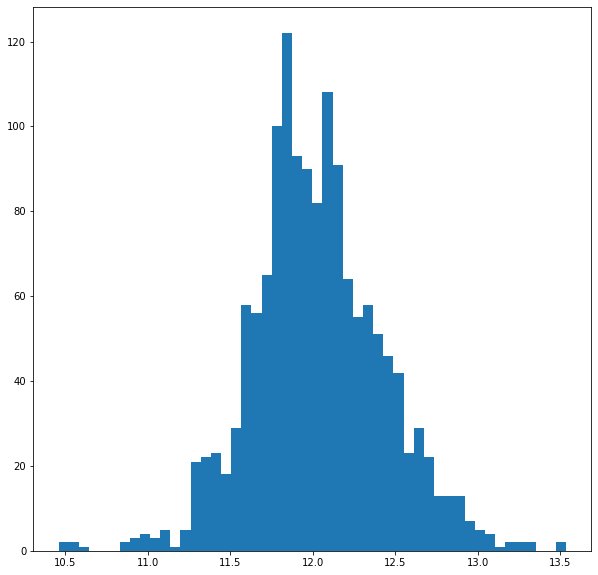

In [22]:
plt.figure(figsize= (10,10))
plt.hist(train['SalePriceLog'], bins = 50)
plt.show()

In [23]:
de = pre.LabelEncoder()
de.fit(train['OverallQual'])

train['OverallQual_encoded'] = de.transform(train['OverallQual'])

de2 = pre.LabelEncoder()
de2.fit(test['OverallQual'])

test['OverallQual_encoded'] = de2.transform(test['OverallQual'])

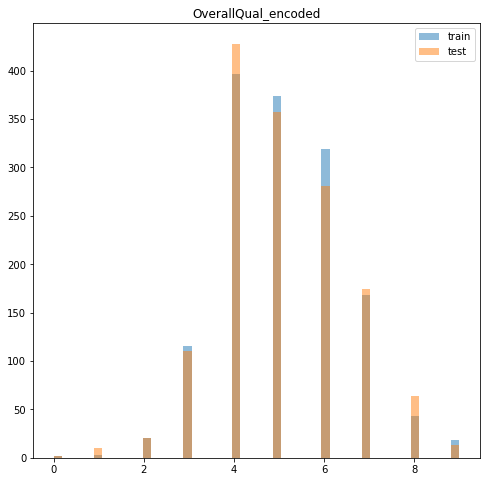

In [24]:
plt.figure(figsize= (8,8))
plt.hist(train['OverallQual_encoded'], bins = 50, label = 'train', alpha = 0.5)
plt.hist(test['OverallQual_encoded'], bins = 50, label = 'test', alpha = 0.5)
plt.title('OverallQual_encoded')
plt.legend(('train', 'test'))
plt.show()

In [25]:
de = pre.LabelEncoder()
de.fit(train['OverallCond'])

train['OverallCond_encoded'] = de.transform(train['OverallCond'])

de2 = pre.LabelEncoder()
de2.fit(test['OverallCond'])

test['OverallCond_encoded'] = de2.transform(test['OverallCond'])

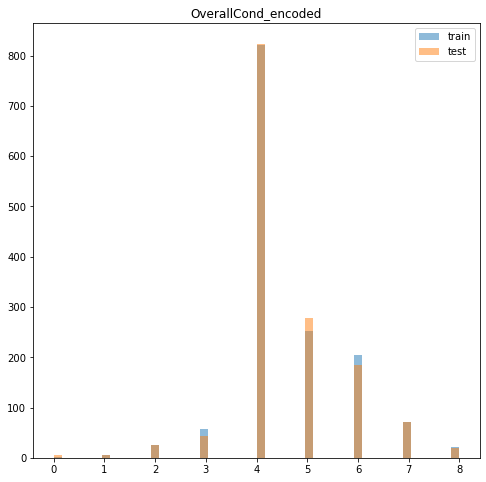

In [26]:
plt.figure(figsize= (8,8))
plt.hist(train['OverallCond_encoded'], bins = 50, label = 'train', alpha = 0.5)
plt.hist(test['OverallCond_encoded'], bins = 50, label = 'test', alpha = 0.5)
plt.title('OverallCond_encoded')
plt.legend(('train', 'test'))
plt.show()

In [27]:
_max = max(max(train['OverallQual_encoded']), max(test['OverallQual_encoded']))
_min = min(min(train['OverallQual_encoded']), min(test['OverallQual_encoded']))
print(_min , _max)

train['OverallQual_encoded'] = pre.scale(train['OverallQual_encoded'])
test['OverallQual_encoded'] = pre.scale(test['OverallQual_encoded'])

0 9


In [28]:
kf = KFold(n_splits=5)
kf.get_n_splits(train)

5

In [29]:
print(kf)
model = SGDRegressor()
rmse_list = []

for i, (train_index, test_index) in enumerate(kf.split(train)):
    
    X_train, X_test = train.loc[train_index, ['OverallCond_encoded']], train.loc[test_index, ['OverallCond_encoded']]
    y_train, y_test = train.loc[train_index, 'SalePriceLog'], train.loc[test_index, 'SalePriceLog']

    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(predict,y_test))
    rmse_list.append(rmse)
    print(i, rmse)
    
print("Mean rmse for 5-fold: {}".format(str(np.mean(rmse_list))))
print("std rmse for 5-fold: {}".format(str(np.std(rmse_list))))

KFold(n_splits=5, random_state=None, shuffle=False)
0 0.4019723221842499
1 0.45107232813664977
2 0.4253270677257447
3 0.38901476333366575
4 0.41217638664524303
Mean rmse for 5-fold: 0.4159125736051106
std rmse for 5-fold: 0.021244401325243696


In [30]:
_max = max(max(train['OverallCond_encoded']), max(test['OverallCond_encoded']))
_min = min(min(train['OverallCond_encoded']), min(test['OverallCond_encoded']))
print(_min , _max)

0 8


In [31]:
train['OverallCond_encoded'] = (train['OverallCond_encoded'] - _min)/(_max - _min)
test['OverallCond_encoded'] = (test['OverallCond_encoded'] - _min)/(_max - _min)

In [32]:
print(kf)
model = SGDRegressor()
rmse_list = []

for i, (train_index, test_index) in enumerate(kf.split(train)):
    
    X_train, X_test = train.loc[train_index, ['OverallQual_encoded', 'OverallCond_encoded']], train.loc[test_index, ['OverallQual_encoded', 'OverallCond_encoded']]
    y_train, y_test = train.loc[train_index, 'SalePriceLog'], train.loc[test_index, 'SalePriceLog']

    model.fit(X_train, y_train)
    print("model.coef_: ", model.coef_)
    predict = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(predict,y_test))
    rmse_list.append(rmse)
    print(i, rmse)
    
print("Mean rmse for 5-fold: {}".format(str(np.mean(rmse_list))))
print("std rmse for 5-fold: {}".format(str(np.std(rmse_list))))

KFold(n_splits=5, random_state=None, shuffle=False)
model.coef_:  [0.35051382 2.15785267]
0 0.35168940118077857
model.coef_:  [0.35966239 2.35387993]
1 0.43876830629836344
model.coef_:  [0.34607143 2.13562471]
2 0.3411379121524915
model.coef_:  [0.36533725 2.2908978 ]
3 0.3856139684478501
model.coef_:  [0.35397492 2.14283645]
4 0.3428940184132163
Mean rmse for 5-fold: 0.37202072129853997
std rmse for 5-fold: 0.03702834527986081


In [33]:
train['OverallCond_encoded'] = pre.scale(train['OverallCond_encoded'])
test['OverallCond_encoded'] = pre.scale(test['OverallCond_encoded'])

In [34]:
print(kf)
model = SGDRegressor()
rmse_list = []

for i, (train_index, test_index) in enumerate(kf.split(train)):
    
    X_train, X_test = train.loc[train_index, ['OverallQual_encoded', 'OverallCond_encoded']], train.loc[test_index, ['OverallQual_encoded', 'OverallCond_encoded']]
    y_train, y_test = train.loc[train_index, 'SalePriceLog'], train.loc[test_index, 'SalePriceLog']

    model.fit(X_train, y_train)
    print("model.coef_: ", model.coef_)
    predict = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(predict,y_test))
    rmse_list.append(rmse)
    print(i, rmse)
    
print("Mean rmse for 5-fold: {}".format(str(np.mean(rmse_list))))
print("std rmse for 5-fold: {}".format(str(np.std(rmse_list))))

KFold(n_splits=5, random_state=None, shuffle=False)
model.coef_:  [0.32924319 0.01687417]
0 0.22281406803637685
model.coef_:  [0.32688197 0.02108623]
1 0.252012985226971
model.coef_:  [0.32274399 0.01256604]
2 0.23380520614209738
model.coef_:  [0.32980432 0.0119298 ]
3 0.21183350068064363
model.coef_:  [0.32664538 0.00968777]
4 0.2283796100335532
Mean rmse for 5-fold: 0.22976907402392843
std rmse for 5-fold: 0.01328961592901717


In [35]:
model = SGDRegressor()
model.fit(train[['OverallQual_encoded', 'OverallCond_encoded']], train['SalePriceLog'])
model.coef_

array([0.32733484, 0.01591722])

In [36]:
model.intercept_

array([12.02394771])

In [37]:
prediction = model.predict(test[['OverallQual_encoded', 'OverallCond_encoded']])

In [38]:
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [39]:
sample_submission['SalePrice']=  np.expm1(prediction)

In [40]:
sample_submission.head()

,Id,SalePrice
0,1461,131197.298635
1,1462,164778.515458
2,1463,129334.955272
3,1464,164778.515458
4,1465,256237.468484


In [41]:
sample_submission.to_csv('submission.csv', index = None)

In [42]:
0.22987

0.22987